In [1]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ground truth model
N, R = 100, 3
factors = [np.random.randn(N, R) for _ in range(3)]

# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
data += np.random.randn(*data.shape) # add noise

In [6]:
fit_kw = {
    'ranks': range(1, 9),
    'replicates': 3,
    'p_holdout': .9,
    'options': {
        'tol': 1e-2
    }
}

In [7]:
results = tt.fit_ensemble(data, **fit_kw)

Optimizing rank-1 models.
   3/3 converged, min error = 0.8709, max error = 0.9928, mean error = 0.9207, time to fit = 0.7096s
Optimizing rank-2 models.
   3/3 converged, min error = 0.6808, max error = 0.7467, mean error = 0.7029, time to fit = 2.9747s
Optimizing rank-3 models.
   3/3 converged, min error = 0.5180, max error = 0.6686, mean error = 0.5683, time to fit = 3.5100s
Optimizing rank-4 models.
   3/3 converged, min error = 0.5189, max error = 0.6665, mean error = 0.5684, time to fit = 4.5236s
Optimizing rank-5 models.
   3/3 converged, min error = 0.5191, max error = 0.5216, mean error = 0.5202, time to fit = 5.4614s
Optimizing rank-6 models.
   3/3 converged, min error = 0.5141, max error = 0.5161, mean error = 0.5154, time to fit = 8.2025s
Optimizing rank-7 models.
   3/3 converged, min error = 0.5137, max error = 0.5187, mean error = 0.5165, time to fit = 7.4320s
Optimizing rank-8 models.
   3/3 converged, min error = 0.5147, max error = 0.5194, mean error = 0.5170, time t

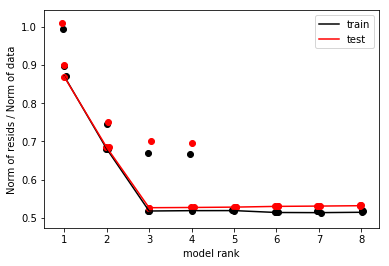

In [8]:
ax = tt.plot_error(results, partition='train',
                   line_kw=dict(c='k', label='train'), scatter_kw=dict(c='k'));
tt.plot_error(results, partition='test', ax=ax,
              line_kw=dict(c='r', label='test'), scatter_kw=dict(c='r'));
plt.legend()